<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/Copy_of_Multiple_Comparisons1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, '')

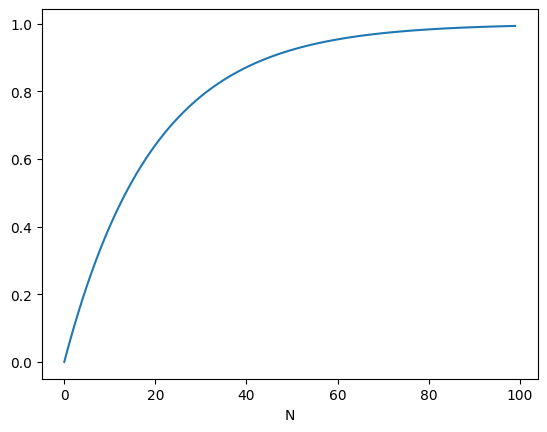

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('')


In [ ]:
#The simplest way to correct for Type I errors (false positives) in multiple comparisons is to divide  by the number of comparisons,
#Bonferroni correction
#his is a very conservative test that is typically used when the number of comparisons is relatively small and you want to avoid Type I errors.


In [ ]:
#Benjamini–Hochberg procedure
#1. Rank the individual p-values in ascending order, labeled i=1...n

#2. For each p-value, calculate its "critical value" as (i/n)Q, where i is the
#rank, n is the total number of tests, and Q is the false discovery rate
#(a percentage) that you choose (typically 0.05).

#3. In your rank-ordered, original p-values, find the largest value that is
#smaller than its associated critical value; this p-value is the new criterion
#(i.e., reject  for all cases for which p ≤ this value).


In [ ]:
#First, simulate multiple (say, 1000) t-tests comparing two samples with equal
#means and standard deviations, and save the p-values. Obviously, at p<0.05 we
#expect that ~5% of the simulations to yield a "statistically significant"
#result (of rejecting the NULL hypothesis that the samples come from
#distributions with equal means).

In [42]:
#python code to get two samples with same mean and standard deviation (from chat gpt)
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
#saving p-values
p_values = []

# Sample size
n = 10

# Generate random samples
sample1 = np.random.randn(n)  # Standard normal distribution
mean1 = np.mean(sample1)
std1 = np.std(sample1)
sample2 = np.random.randn(n)
mean2 = np.mean(sample1)
std2 = np.std(sample1)


# Verify
print("Sample 1:", sample1)
print("Sample 2:", sample2)
print("\nMeans:", np.mean(sample1), np.mean(sample2_transformed))
print("Standard Deviations:", np.std(sample1), np.std(sample2_transformed))

#Run a t-test on these two smaple
# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(sample1, sample2_transformed)

print("t-statistic:", t_stat)
print("p-value:", p_value)



Sample 1: [ 0.35778736  0.56078453  1.08305124  1.05380205 -1.37766937 -0.93782504
  0.51503527  0.51378595  0.51504769  3.85273149]
Sample 2: [ 0.57089051  1.13556564  0.95400176  0.65139125 -0.31526924  0.75896922
 -0.77282521 -0.23681861 -0.48536355  0.08187414]

Means: 0.6136531169136121 0.44806111169875623
Standard Deviations: 1.318174056885202 0.6859059302944952
t-statistic: 0.3343152509375819
p-value: 0.7420054646544506


Total tests run: 1000
Significant results (p < 0.05): 46
Proportion of significant results: 4.60%


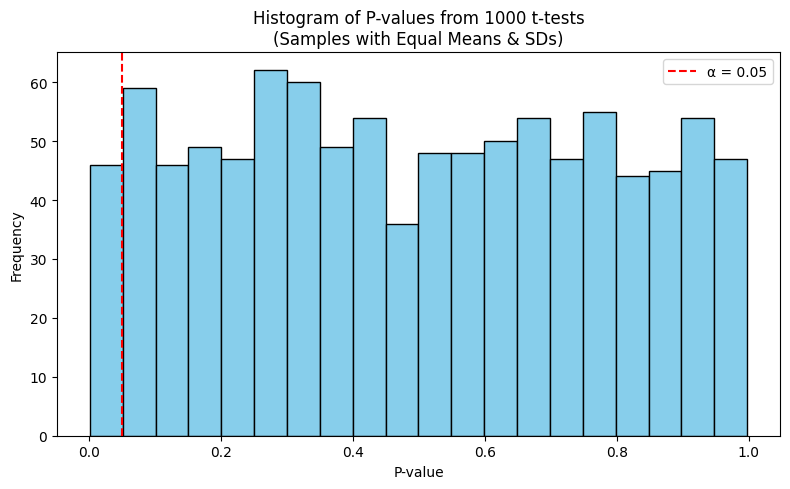

In [80]:
#tried to do it on my own, but things were just going wrong and I didn't know
#why. Very frustatring so this whole thing si from chatgtp.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Parameters ---
num_tests = 1000       # Number of simulated t-tests
sample_size = 30       # Size of each sample
alpha = 0.05           # Significance level

# --- Simulate t-tests ---
p_values = []
for _ in range(num_tests):
    # Generate two samples from the same distribution (mean=0, std=1)
    sample1 = np.random.normal(0, 1, sample_size)
    sample2 = np.random.normal(0, 1, sample_size)

    # Two-sample independent t-test
    _, p = ttest_ind(sample1, sample2)
    p_values.append(p)

p_values = np.array(p_values)

# --- Count significant results ---
num_significant = np.sum(p_values < alpha)
percent_significant = 100 * num_significant / num_tests

# --- Output summary ---
print(f"Total tests run: {num_tests}")
print(f"Significant results (p < {alpha}): {num_significant}")
print(f"Proportion of significant results: {percent_significant:.2f}%")

# --- Plot histogram of p-values ---
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=alpha, color='red', linestyle='--', label=f'α = {alpha}')
plt.title('Histogram of P-values from 1000 t-tests\n(Samples with Equal Means & SDs)')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()







In [79]:
#Second, once you have the simulated p-values, apply both methods to address
#the multiple comparisons problem.



Bonferroni Correction - Significant results (p < 0.05): 0


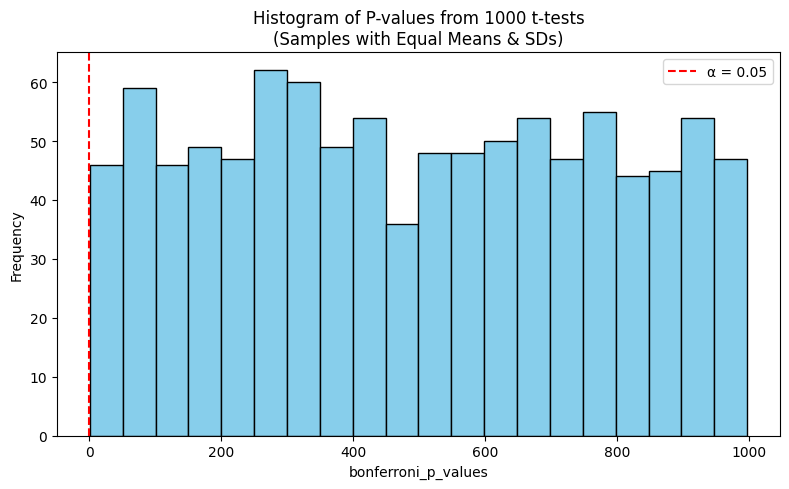

In [85]:
#Bonferroni correction
bonferroni_p_values = p_values * num_tests
num_significant_bonferroni = np.sum(bonferroni_p_values < alpha)
print(f"Bonferroni Correction - Significant results (p < {alpha}): {num_significant_bonferroni}")

# --- Plot histogram of p-values ---
plt.figure(figsize=(8, 5))
plt.hist(bonferroni_p_values, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=alpha, color='red', linestyle='--', label=f'α = {alpha}')
plt.title('Histogram of P-values from 1000 t-tests\n(Samples with Equal Means & SDs)')
plt.xlabel('bonferroni_p_values')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()





In [ ]:
#Third, set the sample 1 and sample 2 means to be 1 and 2 respectively,
#and re-run the exercise. What do you notice? What if you make the
#difference between means even greater?